In [1]:
library(readr)
library(dplyr)
library(stringr)
library(lfe)
library(ggsci)
library(lubridate)
library(ggplot2)
library(doMC)
library(gridExtra)
library(ggpubr)
library(stargazer)
registerDoMC(4)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [2]:
fp <- '/pool001/mfzhao/'
df <- read_rds(str_c(fp, '/PROCESSED_DATA/panel_pre_xgr.RDS'))

In [3]:
cns <- colnames(df)
cns

[1] "key"                  "date"                 "mcbgv"               
  [4] "pnchd"                "pgt1hafh"             "ppthlt75"            
  [7] "pgt2kmt"              "dmcbgv"               "dpnchd"              
 [10] "dpgt1hafh"            "dppthlt75"            "dpgt2kmt"            
 [13] "pcmcbgv"              "pcpnchd"              "pcpgt1hafh"          
 [16] "pcppthlt75"           "pcpgt2kmt"            "cluster"             
 [19] "n"                    "cases"                "deaths"              
 [22] "newcases"             "newdeaths"            "p1sdp"               
 [25] "p2shp"                "p3rop"                "p1sdpDSS"            
 [28] "p2shpDSS"             "p3ropDSS"             "PRCP"                
 [31] "TMAX"                 "PRCP.2019"            "TMAX.2019"           
 [34] "prcp01"               "prcp02"               "prcp03"              
 [37] "prcp04"               "prcp05"               "prcp06"              
 [40] "prcp07"               "prcp08"               "prcp09"              
 [43] "prcp10"               "tmax02"               "tmax03"              
 [46] "tmax04"               "tmax05"               "tmax06"              
 [49] "tmax07"               "tmax08"               "tmax09"              
 [52] "tmax10"               "stalter_mcbgv"        "stalter_pnchd"       
 [55] "stalter_pgt1hafh"     "stalter_ppthlt75"     "stalter_pgt2kmt"     
 [58] "stalter_dmcbgv"       "stalter_dpnchd"       "stalter_dpgt1hafh"   
 [61] "stalter_dppthlt75"    "stalter_dpgt2kmt"     "stalter_pcmcbgv"     
 [64] "stalter_pcpnchd"      "stalter_pcpgt1hafh"   "stalter_pcppthlt75"  
 [67] "stalter_pcpgt2kmt"    "stalter_p1sdp"        "stalter_p2shp"       
 [70] "stalter_p3rop"        "stalter_p1sdpDSS"     "stalter_p2shpDSS"    
 [73] "stalter_p3ropDSS"     "stalter_PRCP.2019"    "stalter_TMAX.2019"   
 [76] "stalter_prcp01"       "stalter_prcp02"       "stalter_prcp03"      
 [79] "stalter_prcp04"       "stalter_prcp05"       "stalter_prcp06"      
 [82] "stalter_prcp07"       "stalter_prcp08"       "stalter_prcp09"      
 [85] "stalter_prcp10"       "stalter_tmax02"       "stalter_tmax03"      
 [88] "stalter_tmax04"       "stalter_tmax05"       "stalter_tmax06"      
 [91] "stalter_tmax07"       "stalter_tmax08"       "stalter_tmax09"      
 [94] "stalter_tmax10"       "alter_mcbgv"          "alter_pnchd"         
 [97] "alter_pgt1hafh"       "alter_ppthlt75"       "alter_pgt2kmt"       
[100] "alter_dmcbgv"         "alter_dpnchd"         "alter_dpgt1hafh"     
[103] "alter_dppthlt75"      "alter_dpgt2kmt"       "alter_pcmcbgv"       
[106] "alter_pcpnchd"        "alter_pcpgt1hafh"     "alter_pcppthlt75"    
[109] "alter_pcpgt2kmt"      "alter_p1sdp"          "alter_p2shp"         
[112] "alter_p3rop"          "alter_p1sdpDSS"       "alter_p2shpDSS"      
[115] "alter_p3ropDSS"       "alter_PRCP.2019"      "alter_TMAX.2019"     
[118] "alter_prcp01"         "alter_prcp02"         "alter_prcp03"        
[121] "alter_prcp04"         "alter_prcp05"         "alter_prcp06"        
[124] "alter_prcp07"         "alter_prcp08"         "alter_prcp09"        
[127] "alter_prcp10"         "alter_tmax02"         "alter_tmax03"        
[130] "alter_tmax04"         "alter_tmax05"         "alter_tmax06"        
[133] "alter_tmax07"         "alter_tmax08"         "alter_tmax09"        
[136] "alter_tmax10"         "log_mcbgv"            "log_pnchd"           
[139] "log_pgt1hafh"         "log_ppthlt75"         "log_pgt2kmt"         
[142] "log_stalter_mcbgv"    "log_stalter_pnchd"    "log_stalter_pgt1hafh"
[145] "log_stalter_ppthlt75" "log_stalter_pgt2kmt"  "log_alter_mcbgv"     
[148] "log_alter_pnchd"      "log_alter_pgt1hafh"   "log_alter_ppthlt75"  
[151] "log_alter_pgt2kmt"

In [6]:
ldvs <- c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd')
dvs  <- c('mcbgv', 'pnchd', 'pgt1hafh', 'pgt2kmt')

In [22]:
get_coefs <- function(dv, vars, ivmod = F, ...) {
    lhs <- str_c(dv, ' ~ ')
    rhs <- str_c(vars, '| key + date | ')

    if(ivmod == T) {
        alter_weather <- str_c(cns[str_detect(cns, '^stalter_[pt][rm][ca][px][01][0-9]$')], collapse = ' + ')
        iv <- ifelse(str_detect(dv, 'log'), str_replace(dv, 'log', 'log_stalter'), str_c('alter_', dv))
        ivf <- str_c('(', iv, ' ~ ', alter_weather, ') | cluster')
        rhs <- str_c(rhs, ivf)
    } else {
        rhs <- str_c(rhs, '0 | cluster')
    }
    form <- as.formula(str_c(lhs, rhs))
    model <- felm(form, df, weights = df$n, ...)
    
    as.data.frame(summary(model)$coef) %>%
        mutate(var   = rownames(.),
               dv    = dv,
               model = ifelse(vars == f1 | vars == f3, 'base', 'ap'),
               model = ifelse(ivmod, str_c(model, ' + iv'), model)) %>%
        filter(!str_detect(var, '[pPtT][rRmM][cCaA][pPxX]')) %>%
        select(7, 6, 5, 1, 2, 3, 4) -> out
    
    colnames(out) <- c('model', 'dv', 'var', 'estimate', 'se', 't', 'p-val')
    return(out)
}

In [13]:
f1 <- ' p1sdp + p2shp + p3rop + PRCP + newcases + newdeaths + poly(PRCP, 2, raw = T) + TMAX + poly(PRCP, 2, raw = T) '  
f2 <- ' p1sdp + p2shp + p3rop + stalter_p1sdp + stalter_p2shp + stalter_p3rop + newcases + newdeaths + PRCP + poly(PRCP, 2, raw = T) + TMAX + poly(PRCP, 2, raw = T) '
f3 <- ' p1sdp + p2shp + p3rop + PRCP + poly(PRCP, 2, raw = T) + TMAX + poly(PRCP, 2, raw = T) '  
f4 <- ' p1sdp + p2shp + p3rop + stalter_p1sdp + stalter_p2shp + stalter_p3rop + PRCP + poly(PRCP, 2, raw = T) + TMAX + poly(PRCP, 2, raw = T) '

In [23]:
foreach(dv = ldvs, .combine = rbind) %:% 
    foreach(f = c(f3, f4), .combine = rbind) %:%
    foreach(ivmod = F, .combine = rbind) %dopar%
    get_coefs(dv, f, ivmod) -> coefs2

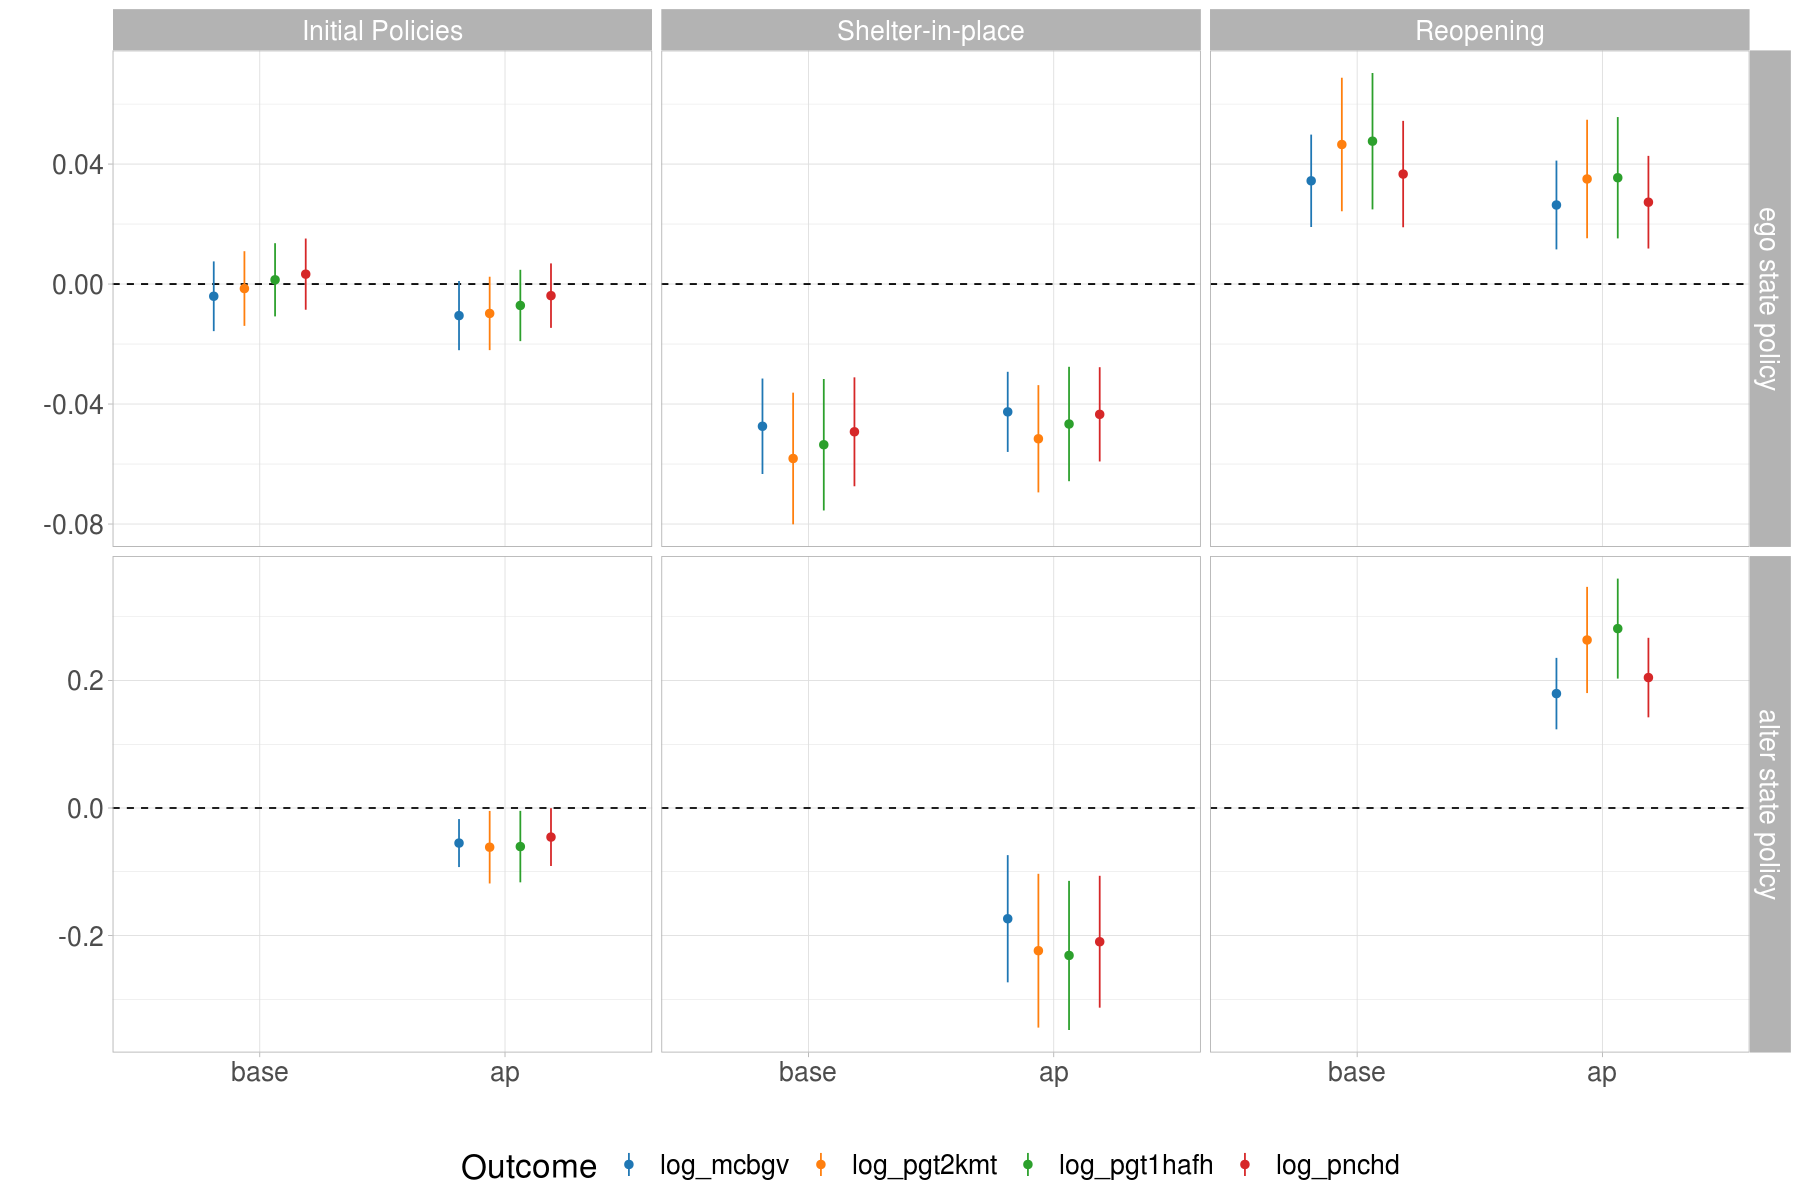

In [24]:
options(repr.plot.width=15, repr.plot.height=10)
pn <- c('p1sdp' = "Initial Policies",
        'p2shp' = "Shelter-in-place",
        'p3rop' = "Reopening",
        'a'     = 'ego state policy',
        'b'     = 'alter state policy')

coefs2 %>%
    mutate(dv  = str_replace(dv, '\\.r', ''),
           var = str_replace(var, '\\.r', ''),
           var = ifelse(str_detect(var, 'fit'), 'Peer Effect', var)) %>%
    filter(var != 'Peer Effect') %>%
    filter(model != 'base + iv') %>%
    mutate(vtype = ifelse(str_detect(var, 'stalter'), 'b', 'a'),
           var   = str_replace(var, 'stalter_', ''),
           model = factor(model, levels = c('base', 'base + iv', 'ap', 'ap + iv')),
           dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = model, y = estimate, color = dv)) +
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(vtype~var, scales = 'free_y', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> p2a

ggsave('/home/mfzhao/p2.svg', p2a, device = 'svg', width = 4.5, height = 5, scale = 2)
p2a

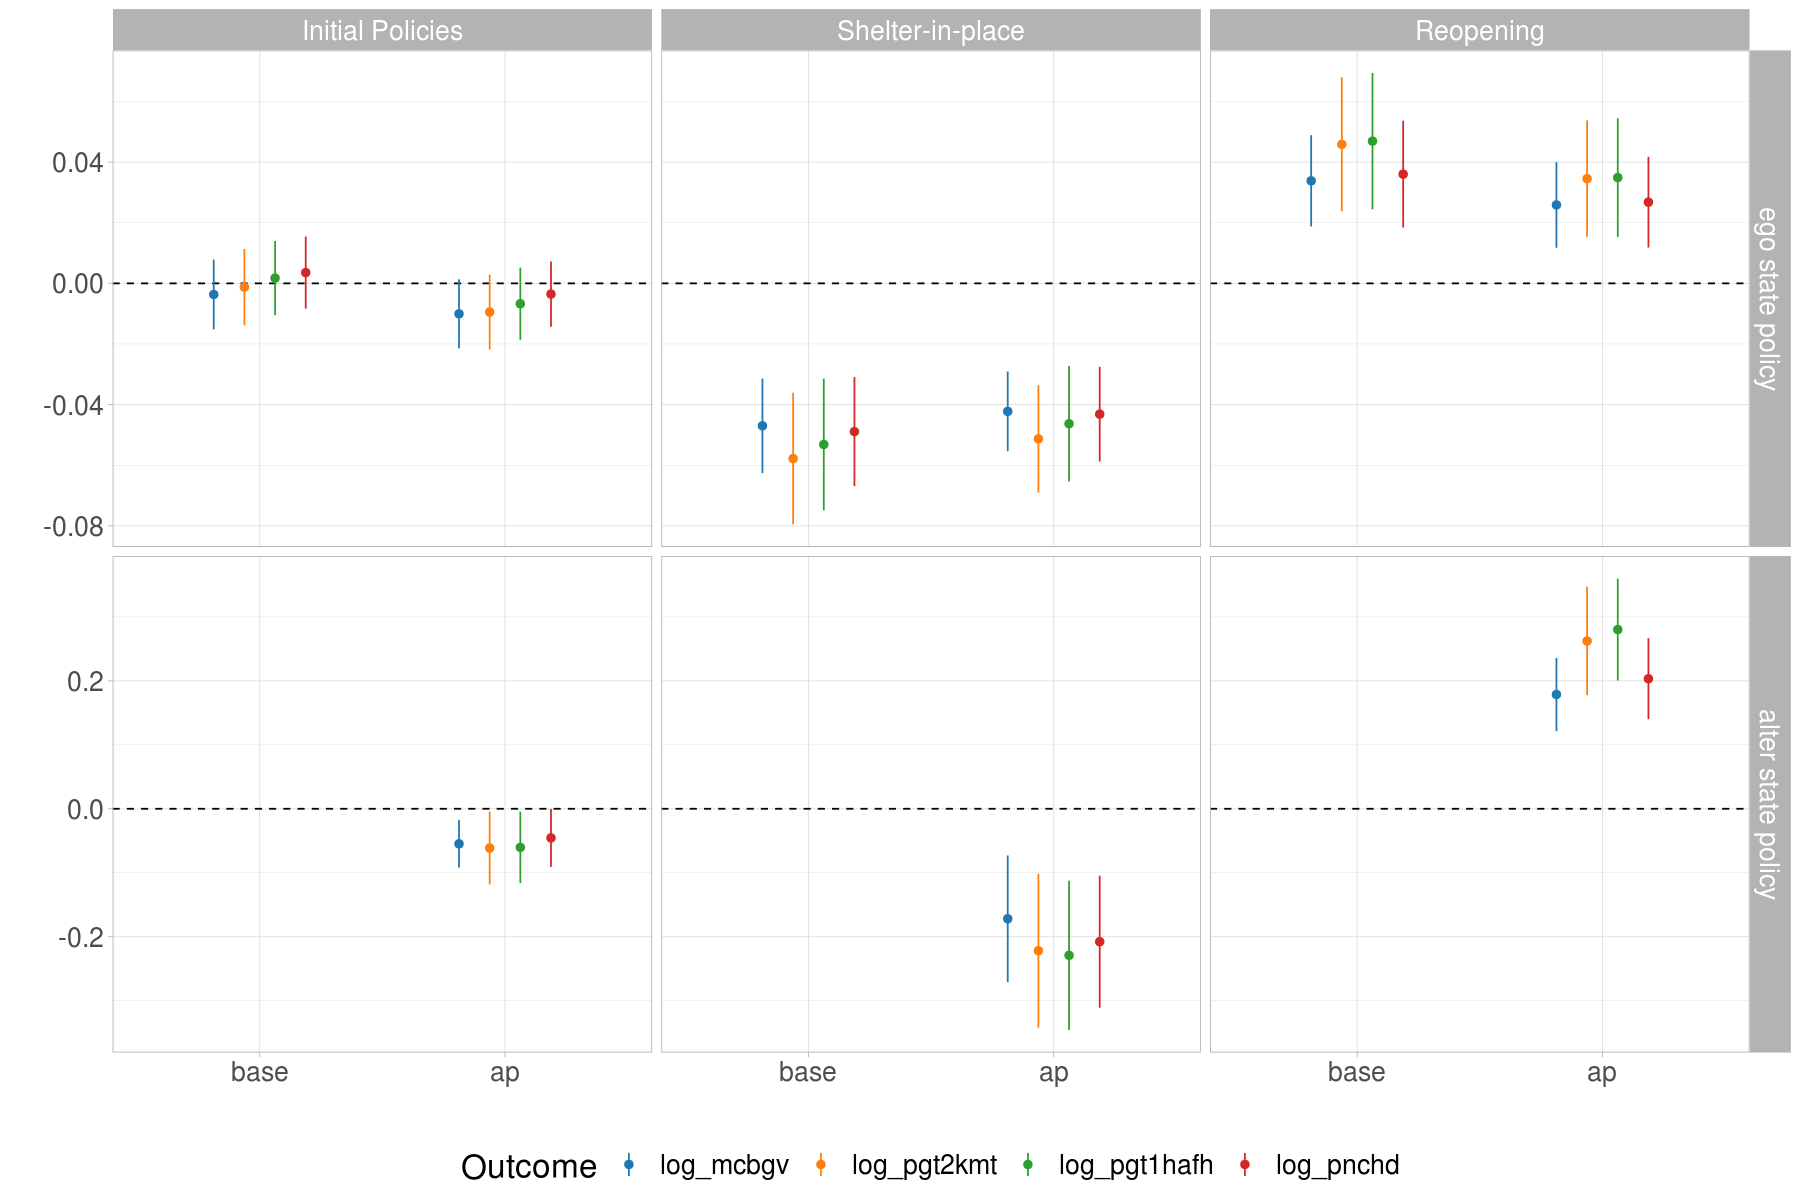

In [25]:
options(repr.plot.width=15, repr.plot.height=10)
pn <- c('p1sdp' = "Initial Policies",
        'p2shp' = "Shelter-in-place",
        'p3rop' = "Reopening",
        'a'     = 'ego state policy',
        'b'     = 'alter state policy')

coefs %>%
    mutate(dv  = str_replace(dv, '\\.r', ''),
           var = str_replace(var, '\\.r', ''),
           var = ifelse(str_detect(var, 'fit'), 'Peer Effect', var)) %>%
    filter(var != 'Peer Effect') %>%
    filter(!str_detect(var, 'new')) %>%
    filter(model != 'base + iv') %>%
    mutate(vtype = ifelse(str_detect(var, 'stalter'), 'b', 'a'),
           var   = str_replace(var, 'stalter_', ''),
           model = factor(model, levels = c('base', 'base + iv', 'ap', 'ap + iv')),
           dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = model, y = estimate, color = dv)) +
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(vtype~var, scales = 'free_y', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> p2a

ggsave('/home/mfzhao/p2.svg', p2a, device = 'svg', width = 4.5, height = 5, scale = 2)
p2a

In [ ]:
get_models <- function(dv, vars, ivmod = F, ...) {
    lhs <- str_c(dv, ' ~ ')
    rhs <- str_c(vars, '| key + date | ')

    if(ivmod == T) {
        alter_weather <- str_c(cns[str_detect(cns, '^stalter_[pt][rm][ca][px][01][0-9]\\.r$')], collapse = ' + ')
        iv <- ifelse(str_detect(dv, 'log'), str_replace(dv, 'log', 'log_stalter'), str_c('stalter_', dv))
        ivf <- str_c('(', iv, ' ~ ', alter_weather, ') | cluster')
        rhs <- str_c(rhs, ivf)
    } else {
        rhs <- str_c(rhs, '0 | cluster')
    }
    form <- as.formula(str_c(lhs, rhs))
    model <- felm(form, df, weights = df$n, ...)
    
    return(model)
}

In [ ]:
foreach(dv = ldvs) %dopar% get_models(dv, f1, F) -> models_base

In [ ]:
stargazer(models_base)

In [ ]:
foreach(dv = ldvs) %dopar% get_models(dv, f2, F) -> models_ap

In [ ]:
stargazer(models_ap)

In [ ]:
foreach(dv = ldvs) %dopar% get_models(dv, f2, T) -> models_apiv

In [ ]:
stargazer(models_apiv)

In [ ]:
condfstat(models_apiv[[1]])
condfstat(models_apiv[[2]])
condfstat(models_apiv[[3]])
condfstat(models_apiv[[4]])

In [ ]:
foreach(dv = ldvs) %dopar% get_models(dv, f2, T, kclass = 'liml') -> models_apiv_liml

In [ ]:
stargazer(models_apiv_liml)

In [ ]:
coefs %>%
    mutate(dv  = str_replace(dv, '\\.r', ''),
           var = str_replace(var, '\\.r', ''),
           var = ifelse(str_detect(var, 'fit'), 'Peer Effect', var)) %>%
    filter(model == 'ap + iv') -> apiv
    

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
pn <- c('p1sdp' = "Initial Policies",
        'p2shp' = "Shelter-in-place",
        'p3rop' = "Reopening",
        'a'     = 'ego state policy',
        'b'     = 'alter state policy')

coefs %>%
    mutate(dv  = str_replace(dv, '\\.r', ''),
           var = str_replace(var, '\\.r', ''),
           var = ifelse(str_detect(var, 'fit'), 'Peer Effect', var)) %>%
    filter(var != 'Peer Effect') %>%
    filter(model != 'base + iv') %>%
    mutate(vtype = ifelse(str_detect(var, 'stalter'), 'b', 'a'),
           var   = str_replace(var, 'stalter_', ''),
           model = factor(model, levels = c('base', 'base + iv', 'ap', 'ap + iv')),
           dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = model, y = estimate, color = dv)) +
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(vtype~var, scales = 'free_y', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('') +
    ggtitle('A') + 
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'None',
          plot.margin = margin(0, 10, 0, 20)) -> p2a

p2a

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
apiv %>%
    filter(var == 'Peer Effect') %>%
    select(dv, pfxCoef = estimate, pfxSe = se) %>%
    left_join(apiv %>%
              filter(!str_detect(var, 'stalter'),
                     var != 'Peer Effect')) %>%
    mutate(estimate = estimate * pfxCoef,
           se       = estimate * pfxSe,
           var      = str_c('pfx_', var)) %>%
    select(model, dv, var, estimate, se, t, `p-val`) %>%
    bind_rows(apiv %>%
              filter(var != 'Peer Effect',
                     !str_detect(var, 'stalter'))) %>%
    mutate(policy = str_sub(var, -5, -1),
           type   = ifelse(str_detect(var, 'pfx'), 'Peer Effect',
                           ifelse(str_detect(var, 'stalter'), 'Alter Policy', 'Ego Policy')),
           dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = type, y = estimate, color = dv)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(policy~., scales = 'free_y', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('') +
    ggtitle('B') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'None', 
          plot.margin = margin(0, 10, 0, 20)) -> p2b

p2b
#ggsave('/home/mfzhao/p2b.svg', p2b, device = 'svg', width = 2, height = 5, scale = 2)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
pn <- c('p1sdp' = "Initial Policies",
        'p2shp' = "Shelter-in-place",
        'p3rop' = "Reopening",
        'a'     = 'ego state policy',
        'b'     = 'alter state policy')

coefs %>%
    mutate(dv  = str_replace(dv, '\\.r', ''),
           var = str_replace(var, '\\.r', ''),
           var = ifelse(str_detect(var, 'fit'), 'Peer Effect', var)) %>%
    filter(var != 'Peer Effect') %>%
    filter(model != 'base + iv') %>%
    mutate(vtype = ifelse(str_detect(var, 'stalter'), 'b', 'a'),
           var   = str_replace(var, 'stalter_', ''),
           model = factor(model, levels = c('base', 'base + iv', 'ap', 'ap + iv')),
           dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = model, y = estimate, color = dv)) +
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(vtype~var, scales = 'free_y', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> leg


get_legend(leg) %>%
    as_ggplot() -> leg

In [ ]:
p2a + theme(plot.title = element_text(hjust = -0.05, vjust = -1)) -> p2a
p2b + theme(plot.title = element_text(hjust = -0.05, vjust = -1)) -> p2b

In [ ]:
p2a + theme(plot.title = element_text(size = 30, hjust = -0.075, vjust = -1.5)) -> p2a
p2b + theme(plot.title = element_text(size = 30, hjust = -0.25, vjust = -1.5)) -> p2b
lay <- rbind(c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             rep(3, 24))
grid.arrange(grobs = list(p2a, p2b, leg), layout_matrix = lay) -> p2

ggsave('/home/mfzhao/p2.pdf', p2, device = 'pdf', width = 6.5, height = 5, scale = 2)

In [ ]:
ggsave('/home/mfzhao/p2.pdf', p2, device = 'pdf', width = 6.5, height = 5, scale = 2)

In [ ]:
ggsave('/home/mfzhao/p2leg.svg', leg, device = 'svg', width = 6.5, height = 5, scale = 2)